<a href="https://colab.research.google.com/github/AzgalarDev/proyecto-finalu/blob/main/train_dataset_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#importing dataset
pima=pd.read_csv("diabetes.csv")
pima.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
pima.describe()
#independent variable
ind_var=pima[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
#dependent variable
dep_var=pima.Outcome

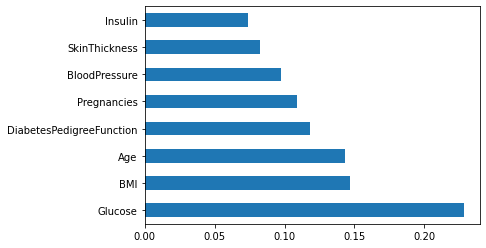

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(ind_var,dep_var)
#print(model.feature_importances_)
feat_imp=pd.Series(model.feature_importances_,index=ind_var.columns)
feat_imp.nlargest(8).plot(kind='barh')
plt.show()

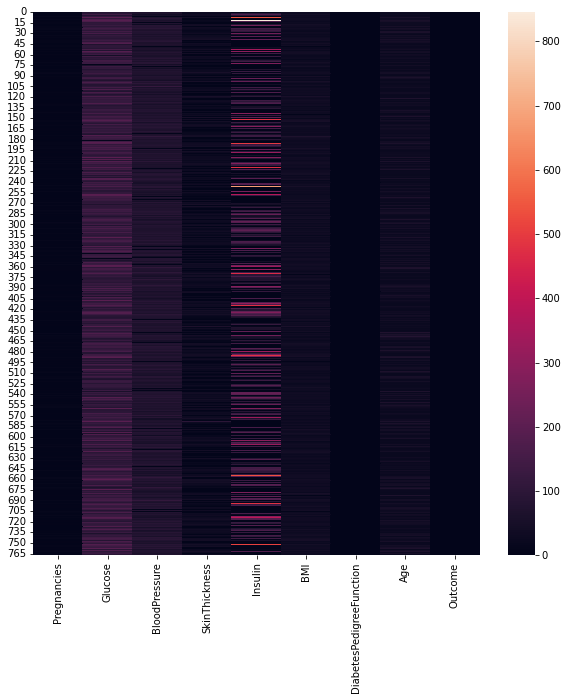

In [ ]:
cor_mat=pima.corr()
top=cor_mat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(pima[top])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(ind_var,dep_var,test_size=0.25,random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(X_train,y_train)
y_pred_logistic=lr_model.predict(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=9)
y_pred_knn = knn_model.fit(X_train, y_train).predict(X_test)


In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
y_pred_navie= nb_model.fit(X_train, y_train).predict(X_test)

In [ ]:
from sklearn.svm import LinearSVC
svc_model = LinearSVC(random_state=0)
y_pred_svc = svc_model.fit(X_train, y_train).predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier()
y_pred_dtc = dtc_model.fit(X_train, y_train).predict(X_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()
y_pred_rfc = rfc_model.fit(X_train, y_train).predict(X_test)


In [ ]:
import math as mt
from sklearn import metrics

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logistic))
print("Precision:",metrics.precision_score(y_test, y_pred_logistic))
print("Recall:",metrics.recall_score(y_test, y_pred_logistic))
print("F-Score:",metrics.f1_score(y_test, y_pred_logistic))



Accuracy: 0.8072916666666666
Precision: 0.7659574468085106
Recall: 0.5806451612903226
F-Score: 0.6605504587155964


In [ ]:
print("Accuracy for K neighbor Classifier :",metrics.accuracy_score (y_test, y_pred_knn))
print("Precision for K neighbor Classifier :", metrics.precision_score(y_test, y_pred_knn))
print("Recall for K neighbor Classifier :", metrics.recall_score(y_test, y_pred_knn))
print("F-Score for K neighbor Classifier :",metrics.f1_score(y_test, y_pred_knn))
Accuracy for K neighbor Classifier : 0.7727272727272727
Precision for K neighbor Classifier : 0.6304347826086957 
Recall for K neighbor Classifier : 0.6170212765957447 
F-Score for K neighbor Classifier : 0.6236559139784946

Accuracy for K neighbor Classifier : 0.7708333333333334
Precision for K neighbor Classifier : 0.6666666666666666
Recall for K neighbor Classifier : 0.5806451612903226
F-Score for K neighbor Classifier : 0.6206896551724138
